In [1]:
import numpy as np
import numpy.linalg
import scipy as sc
from scipy.optimize import minimize_scalar, minimize
from scipy.misc import derivative
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,10)
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, HTML
from IPython.display import Image, SVG
import time
%matplotlib notebook
#%matplotlib inline
%load_ext tikzmagic
#import tikzmagic
#https://github.com/mkrphys/ipython-tikzmagic
#http://blog.invibe.net/posts/2015-01-20-using-tikzmagic.html
#https://stackoverflow.com/questions/45671481/how-do-i-center-the-outputs-on-a-python-jupyter-notebook
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))
#print(sc.__version__)
#print(numpy.__version__)

The tikzmagic module is not an IPython extension.


# <center>CMT Seminar</center>
## <center>The Variational Principle in Mean Field Theories <br> - Example of the Antiferromagnetic Ising Model -</center>

## The Antiferromagnetic Ising Model

\begin{equation}
\hat{H} = J\sum_{\left<ij\right>} \hat{\sigma}_{i}\hat{\sigma}_{j} 
\end{equation}


We set $J=1$ and $k_B = 1$.

### 2-Site Unit Cell

In [3]:
%%tikz -f png -s 800,500 -sc 1.2
\tikzset{>=stealth,font=\Large};
\draw [line width=0.5mm, fill=blue!20]	(+3,+1)	rectangle	(+5,+5);
\draw [style=help lines, step=2]				(-1,-1)	grid		(+9,+7);
 
\filldraw [color=gray]	(0,0) circle (.1);
\filldraw [color=gray]	(0,2) circle (.1);
\filldraw [color=gray]	(0,4) circle (.1);
\filldraw [color=gray]	(0,6) circle (.1);

\filldraw [color=gray]	(2,0) circle (.1);
\filldraw [color=gray]	(2,2) circle (.1);
\filldraw [color=gray]	(2,4) circle (.1);
\filldraw [color=gray]	(2,6) circle (.1);

\filldraw [color=gray]	(4,0) circle (.1);
\filldraw [color=black]	(4,2) circle (.1);
\filldraw [color=black]	(4,4) circle (.1);
\filldraw [color=gray]	(4,6) circle (.1);

\filldraw [color=gray]	(6,0) circle (.1);
\filldraw [color=gray]	(6,2) circle (.1);
\filldraw [color=gray]	(6,4) circle (.1);
\filldraw [color=gray]	(6,6) circle (.1);

\filldraw [color=gray]	(8,0) circle (.1);
\filldraw [color=gray]	(8,2) circle (.1);
\filldraw [color=gray]	(8,4) circle (.1);
\filldraw [color=gray]	(8,6) circle (.1);

\draw [black] ( 4, 2) node[anchor=north] {$\sigma_{(i,j)_a}$};
\draw ( 4, 4) node[anchor=north] {$\sigma_{(i,j)_b}$};
%\draw [blue!60!white] (  4,  2) node[anchor=north west] {$(i+1,j  )$};
%\draw [blue!60!white] (  4,  4) node[anchor=south west] {$(i+1,j+1)$};
%\draw [blue!60!white] (  2,  4) node[anchor=south east] {$(i  ,j+1)$};

usage: ipykernel_launcher.py [-h] [-p LATEX_PACKAGES] [-x LATEX_PREAMBLE]
                             [-l TIKZ_LIBRARIES] [-i INPUT_FILE]
                             [-e EXPORT_FILE] [-s SCALE] [-b BORDER] [--wrap]
                             [--no-wrap] [--debug]
ipykernel_launcher.py: error: argument -s/--scale: invalid float value: '800,500'


SystemExit: 2

## Self-Consistency (Direct Iteration) Procedure

### Self-Consistency Equations

\begin{equation}
m_a = \left< \hat{\sigma}_{i\in a}\right> = - \tanh{\left(\frac{4 m_b}{T}\right)}
\end{equation}
\begin{equation}
m_b = \left< \hat{\sigma}_{i\in b}\right> = - \tanh{\left(\frac{4 m_a}{T}\right)}
\end{equation}

In [3]:
def ma_SCE(m_b, T):
    return( - np.tanh(m_b*4.0/T))

def mb_SCE(m_a, T):
    return( - np.tanh(m_a*4.0/T))

### Direct Iteration - Parameter Declaration/Initialisation

In [4]:
T = 3.0
iter_loopdata_T1 = np.zeros((1,3))

m_a_guess = 0.5
m_b_guess = -0.5

m_a = m_a_guess
m_b = m_b_guess

iter_max = 100
iter_ctr = 0

iter_loopdata_T1[0][0] = 0.0
iter_loopdata_T1[0][1] = m_a
iter_loopdata_T1[0][2] = m_b 

### Direct Iteration - Loop

In [5]:
while iter_ctr < iter_max:

    iter_ctr = iter_ctr + 1
        
    m_b = mb_SCE(m_a,T)
    m_a = ma_SCE(m_b,T)
        
    temp = np.concatenate(([m_a],[m_b]), axis=0)
    temp = np.concatenate(([iter_ctr], temp), axis=0)
    iter_loopdata_T1 = np.vstack([iter_loopdata_T1,temp])

iter_loopdata_T1 = np.delete(iter_loopdata_T1, 0, 0)

In [6]:
T = 4.5
iter_loopdata_T2 = np.zeros((1,3))

m_a_guess = 0.5
m_b_guess = -0.5

m_a = m_a_guess
m_b = m_b_guess

iter_max = 100
iter_ctr = 0

iter_loopdata_T2[0][0] = 0.0
iter_loopdata_T2[0][1] = m_a
iter_loopdata_T2[0][2] = m_b

while iter_ctr < iter_max:

    iter_ctr = iter_ctr + 1
        
    m_b = mb_SCE(m_a,T)
    m_a = ma_SCE(m_b,T)
        
    temp = np.concatenate(([m_a],[m_b]), axis=0)
    temp = np.concatenate(([iter_ctr], temp), axis=0)
    iter_loopdata_T2 = np.vstack([iter_loopdata_T2,temp])

### Direct Iteration - Results

<IPython.core.display.Javascript object>


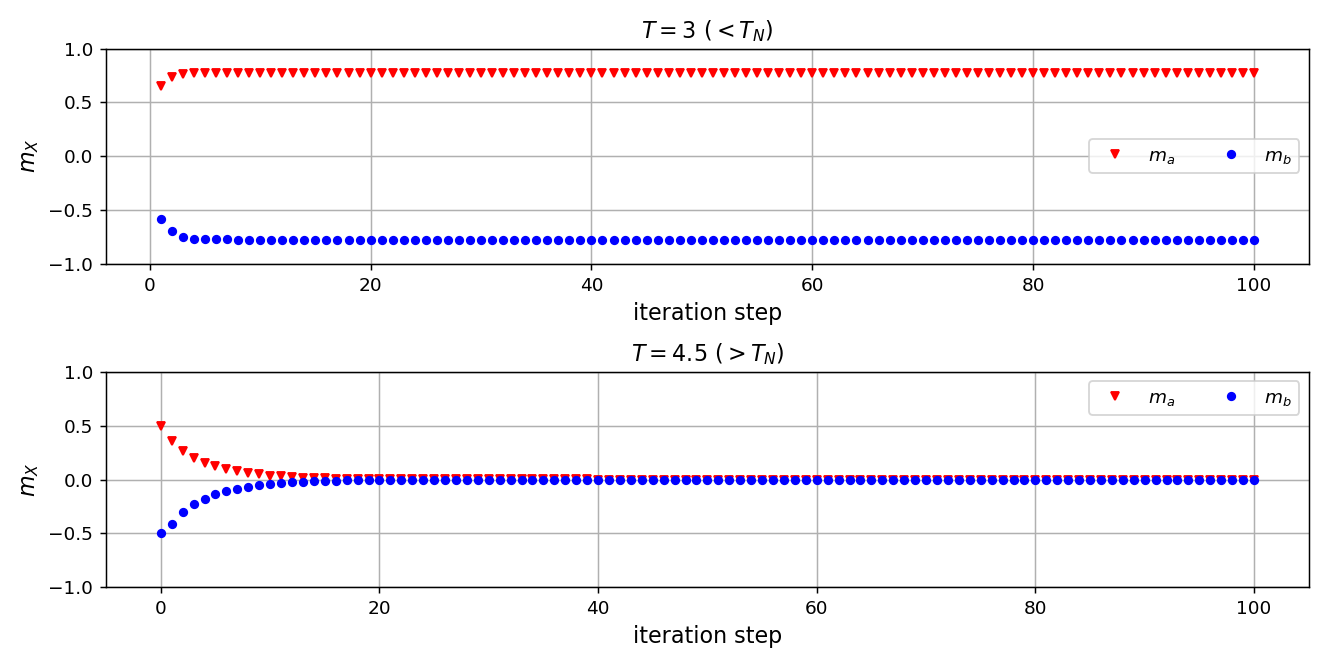

In [7]:
fig = plt.figure(figsize=(10,5), num="Direct Iteration")
ax = fig.add_subplot(2,1,1)

ax.set_xlabel('iteration step', fontsize=12)
ax.set_ylabel('$m_X$', fontsize=12)
ax.set_ylim([-1.0,1.0])

plt.title('$T=3$ ($<T_N$)')

plt.plot([i[0] for i in iter_loopdata_T1], [i[1] for i in iter_loopdata_T1], color='red', label="$m_a$", linestyle=' ', marker = 'v', markersize=4, linewidth=2.0)
plt.plot([i[0] for i in iter_loopdata_T1], [i[2] for i in iter_loopdata_T1], color='blue', label="$m_b$", linestyle=' ', marker = 'o', markersize=4, linewidth=2.0)

plt.legend(loc=0, ncol=2)

plt.grid(True)

ax2 = fig.add_subplot(2,1,2)

ax2.set_xlabel('iteration step', fontsize=12)
ax2.set_ylabel('$m_X$', fontsize=12)
ax2.set_ylim([-1.0,1.0])

plt.title('$T=4.5$ ($>T_N$)')

plt.plot([i[0] for i in iter_loopdata_T2], [i[1] for i in iter_loopdata_T2], color='red', label="$m_a$", linestyle=' ', marker = 'v', markersize=4, linewidth=1.0)
plt.plot([i[0] for i in iter_loopdata_T2], [i[2] for i in iter_loopdata_T2], color='blue', label="$m_b$", linestyle=' ', marker = 'o', markersize=4, linewidth=1.0)

plt.legend(loc=0, ncol=2)

plt.grid(True)

plt.tight_layout()
plt.show()


### Direct Iteration - Phasediagram

In [8]:
T_steps = np.linspace(0.5, 6.1, 50, endpoint=True)
result_SC = np.zeros((1,3))

eps = 1e-8

m_a_guess = 1.0
m_b_guess = -1.0

iter_max = 200
iter_ctr = 0

conv_boolflag = False

m_a = m_a_guess
m_b = m_b_guess

old_m_a = 10.0
old_m_b = 10.0

for T_run in T_steps:
    
    iter_ctr = 0
    conv_boolflag = False
    
    while iter_ctr < iter_max and not conv_boolflag:
        iter_ctr = iter_ctr + 1
        
        m_b = mb_SCE(m_a,T_run)
        m_a = ma_SCE(m_b,T_run)

        if( abs(m_b - old_m_b) <= eps and abs(m_a - old_m_a) <= eps ):
            conv_boolflag = True
            break
        else:
            old_m_a = m_a
            old_m_b = m_b

    temp = np.concatenate(([m_a],[m_b],[T_run]), axis=0)
    result_SC = np.vstack([result_SC,temp])
    
result_SC = np.delete(result_SC, 0, 0)

<IPython.core.display.Javascript object>


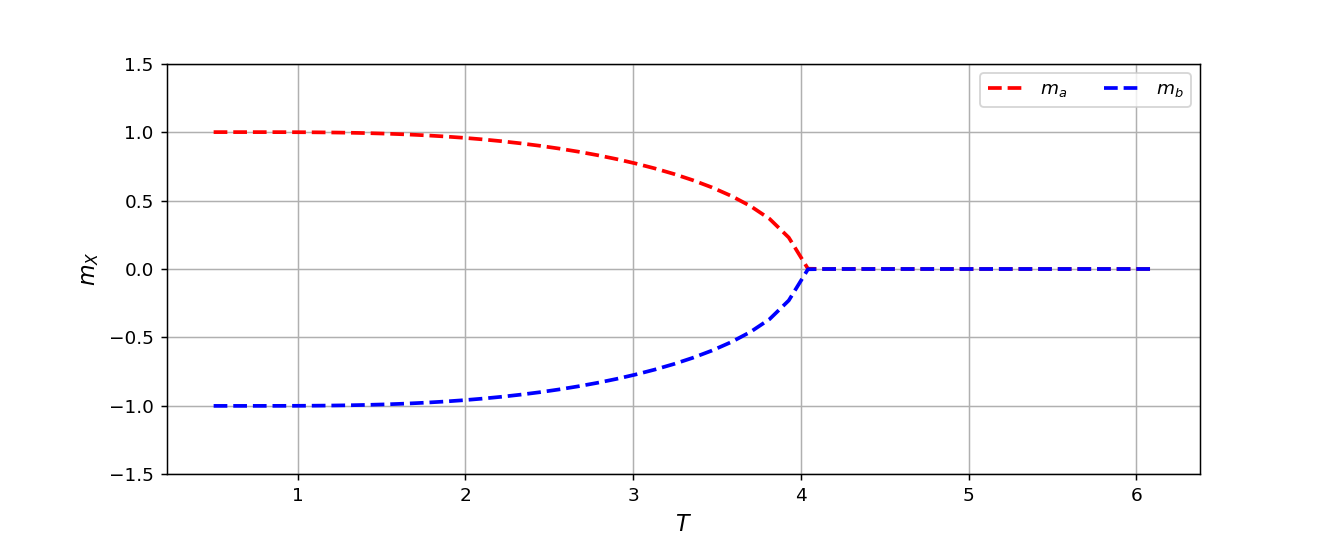

In [9]:
fig = plt.figure(figsize=(10,4), num="Phasediagram Direct Iteration")
ax = fig.add_subplot(111)

ax.set_xlabel('$T$', fontsize=12, fontweight='bold')
ax.set_ylabel('$m_X$', fontsize=12, fontweight='bold')
ax.set_ylim([-1.5,1.5])

plt.plot([i[2] for i in result_SC], [i[0] for i in result_SC], color='red', label="$m_a$", linestyle='--', linewidth=2.0)
plt.plot([i[2] for i in result_SC], [i[1] for i in result_SC], color='blue', label="$m_b$", linestyle='--', linewidth=2.0)

plt.legend(ncol = 2)

plt.grid(True)
plt.show()

## Free Energy Landscape
\begin{equation}
\phi\left(m_a, m_b\right) = -2Jm_am_b - \frac{1}{2\beta}\ln{\left[4\cosh{(4\beta Jm_a)}\cosh{(4\beta Jm_b)}\right]}
\end{equation}

In [10]:
def Free_Energy_SC(m,T):
    m_a = m[0]
    m_b = m[1]
    return(-2.0*m_a*m_b - 0.5*T*np.log(4.0*np.cosh(m_a*4.0/T)*np.cosh(m_b*4.0/T)) )

In [11]:
def Free_Energy_SC_Lineplot(m_a,T):
    m_b = -m_a
    return(-2.0*m_a*m_b - 0.5*T*np.log(4.0*np.cosh(m_a*4.0/T)*np.cosh(m_b*4.0/T)) )

### Free Energy Landscape Plot T = 3.0

<IPython.core.display.Javascript object>


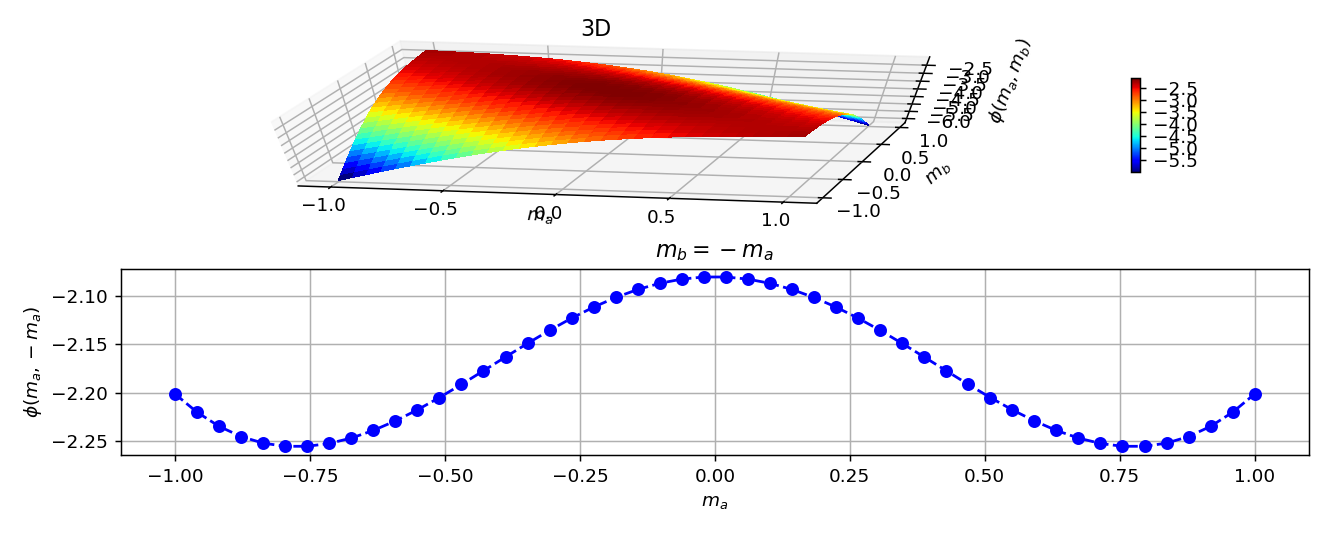

In [12]:
fig = plt.figure(figsize=(10,4), num="T = 3.0")

T = 3.0

ax = fig.add_subplot(2, 1, 1, projection='3d')

ax.set_title("3D")
ax.set_xlabel("$m_a$")
ax.set_ylabel("$m_b$")
ax.set_zlabel("$\phi(m_a,m_b)$") 
ax.set_xticks(np.linspace(-1, 1, 5, endpoint=True))
ax.set_yticks(np.linspace(-1, 1, 5, endpoint=True))
#ax.set_zticks([-2, 0, 2])

m_a = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_b = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_a, m_b = np.meshgrid(m_a, m_b)
FEL = Free_Energy_SC((m_a, m_b),T)

surface = ax.plot_surface(m_a, m_b, FEL, cmap=cm.jet, rstride=1, cstride=1,
                          linewidth=0, antialiased=False)

fig.colorbar(surface, shrink=0.5, aspect=10)

ax2 = fig.add_subplot(2, 1, 2)

ax2.set_title("$m_b = -m_a $")
ax2.set_xlabel("$m_a$")
ax2.set_ylabel("$\phi(m_a,-m_a)$")
ax2.grid(True)

m_a = np.linspace(-1.0, 1.0, 50, endpoint=True)
FEL = Free_Energy_SC_Lineplot(m_a,T)

ax2.plot(m_a, FEL, 'bo--')

plt.tight_layout()

plt.show()

### Free Energy Landscape Plot 3D T = 3.0

<IPython.core.display.Javascript object>


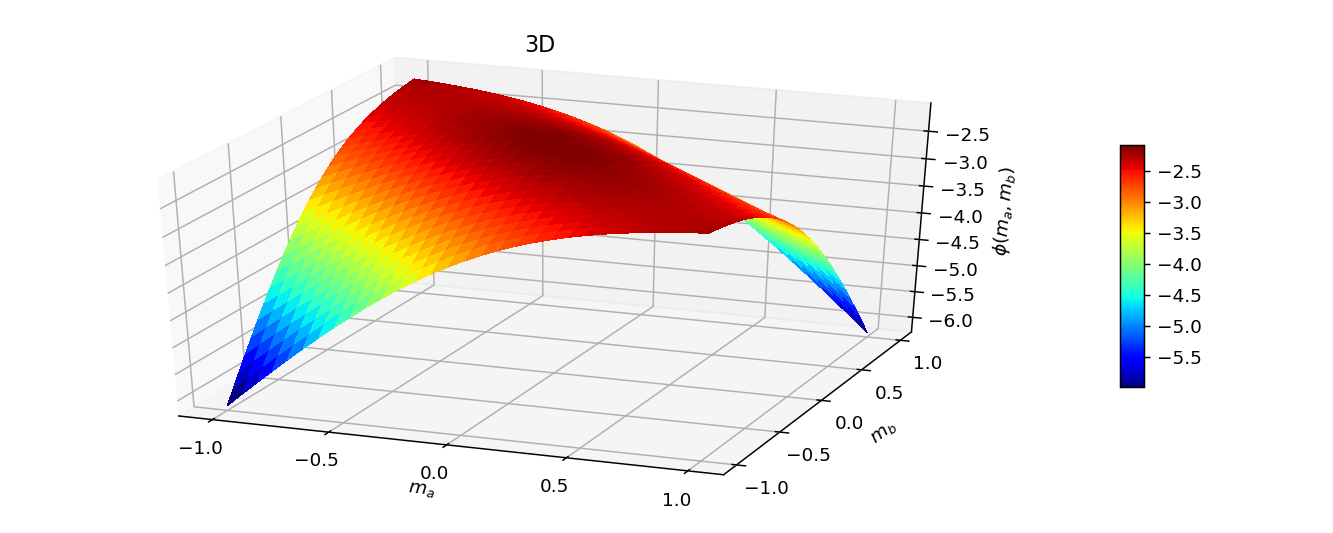

In [13]:
fig = plt.figure(figsize=(10,4), num="T = 3.0 (only 3D)")

T = 3.0

ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.set_title("3D")
ax.set_xlabel("$m_a$")
ax.set_ylabel("$m_b$")
ax.set_zlabel("$\phi(m_a,m_b)$")
ax.set_xticks(np.linspace(-1, 1, 5, endpoint=True))
ax.set_yticks(np.linspace(-1, 1, 5, endpoint=True))
#ax.set_zticks([-2, 0, 2])

m_a = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_b = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_a, m_b = np.meshgrid(m_a, m_b)
FEL = Free_Energy_SC((m_a, m_b),T)

surface = ax.plot_surface(m_a, m_b, FEL, cmap=cm.jet, rstride=1, cstride=1,
                          linewidth=0, antialiased=False)

fig.colorbar(surface, shrink=0.5, aspect=10)

plt.tight_layout()

plt.show()

### Free Energy Landscape Plot T = 4.5

<IPython.core.display.Javascript object>


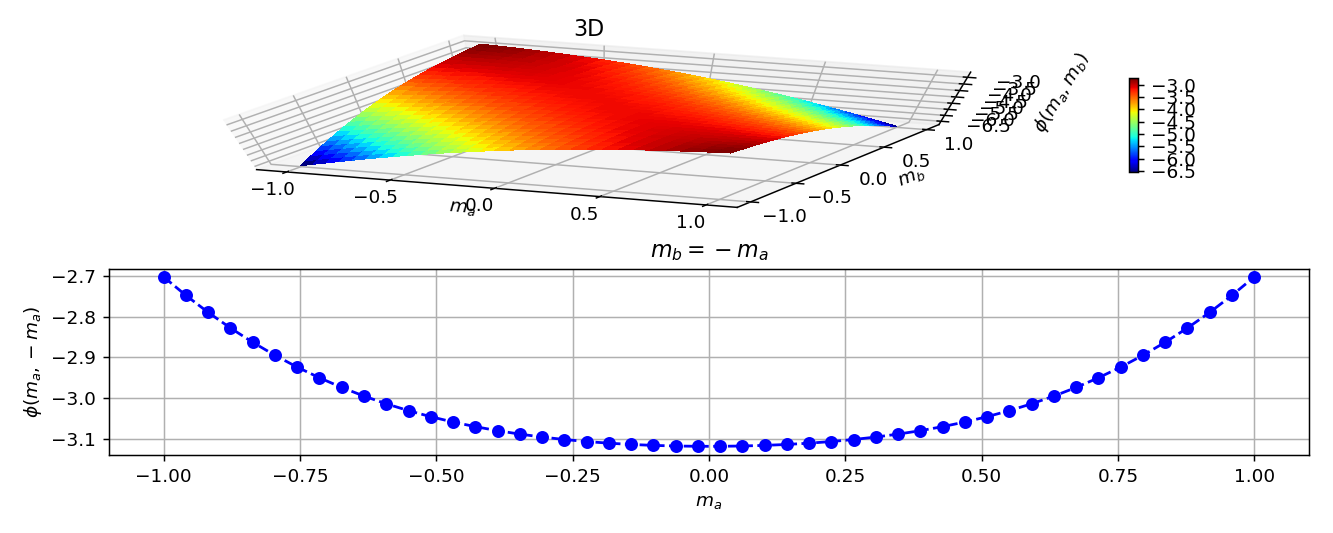

In [14]:
fig = plt.figure(figsize=(10,4), num="T = 4.5")

T = 4.5

ax = fig.add_subplot(2, 1, 1, projection='3d')
 
ax.set_title("3D")
ax.set_xlabel("$m_a$")
ax.set_ylabel("$m_b$")
ax.set_zlabel("$\phi(m_a,m_b)$")
ax.set_xticks(np.linspace(-1, 1, 5, endpoint=True))
ax.set_yticks(np.linspace(-1, 1, 5, endpoint=True))
#ax.set_zticks([-2, 0, 2])

m_a = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_b = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_a, m_b = np.meshgrid(m_a, m_b)
FEL = Free_Energy_SC((m_a, m_b),T)

surface = ax.plot_surface(m_a, m_b, FEL, cmap=cm.jet, rstride=1, cstride=1,
                          linewidth=0, antialiased=False)

fig.colorbar(surface, shrink=0.5, aspect=10)

ax2 = fig.add_subplot(2, 1, 2)

ax2.set_title("$m_b = -m_a $")
ax2.set_xlabel("$m_a$")
ax2.set_ylabel("$\phi(m_a,-m_a)$")
ax2.grid(True)

m_a = np.linspace(-1.0, 1.0, 50, endpoint=True)
FEL = Free_Energy_SC_Lineplot(m_a,T)

ax2.plot(m_a, FEL, 'bo--')

plt.tight_layout()

plt.show()

### Free Energy Landscape Plot 3D T = 4.5

<IPython.core.display.Javascript object>


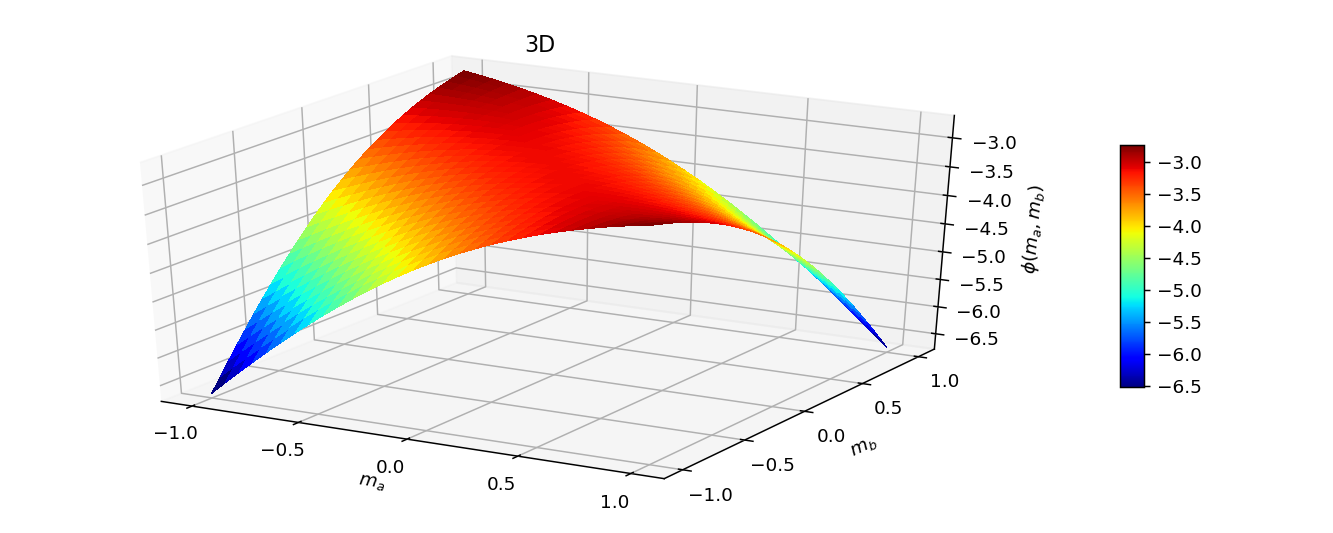

In [15]:
fig = plt.figure(figsize=(10,4), num="T = 4.5 (only 3D)")

T = 4.5

ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.set_title("3D")
ax.set_xlabel("$m_a$")
ax.set_ylabel("$m_b$")
ax.set_zlabel("$\phi(m_a,m_b)$")
ax.set_xticks(np.linspace(-1, 1, 5, endpoint=True))
ax.set_yticks(np.linspace(-1, 1, 5, endpoint=True))
#ax.set_zticks([-2, 0, 2])

m_a = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_b = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_a, m_b = np.meshgrid(m_a, m_b)
FEL = Free_Energy_SC((m_a, m_b),T)

surface = ax.plot_surface(m_a, m_b, FEL, cmap=cm.jet, rstride=1, cstride=1,
                          linewidth=0, antialiased=False)

fig.colorbar(surface, shrink=0.5, aspect=10)

plt.tight_layout()

plt.show()

## Variational Procedure

### Landau Functional
\begin{equation}
\begin{split}
\phi\left(m_a, m_b\right) = &- \frac{1}{2\beta}\ln{\left[4\cosh{(4\beta Jm_a)}\cosh{(4\beta Jm_b)}\right]}\\
&+2J\tanh{(4\beta J m_a)}\tanh{(4\beta J m_b)}\\
&+2J(m_a\tanh{(4\beta J m_a)} + m_b\tanh{(4\beta J m_b)}
\end{split}
\end{equation}

In [16]:
def Landau_Functional(m, T):
    m_a = m[0]
    m_b = m[1]
    return (-0.5*T*np.log(4.0*np.cosh(m_a*4.0/T)*np.cosh(m_b*4.0/T))\
            +2.0*np.tanh(m_a*4.0/T)*np.tanh(m_b*4.0/T)\
            +2.0*(m_a*np.tanh(m_a*4.0/T) + m_b*np.tanh(m_b*4.0/T)))

In [17]:
def Landau_Functional_Lineplot(m_a, T):
    m_b = -m_a
    return 0.5*(-T*np.log(4.0*np.cosh(m_a*4.0/T)*np.cosh(m_b*4.0/T))\
                    +4.0*np.tanh(m_a*4.0/T)*np.tanh(m_b*4.0/T)\
                    +4.0*(m_a*np.tanh(m_a*4.0/T) + m_b*np.tanh(m_b*4.0/T)))

### Landau Functional Plot T = 3.0

<IPython.core.display.Javascript object>


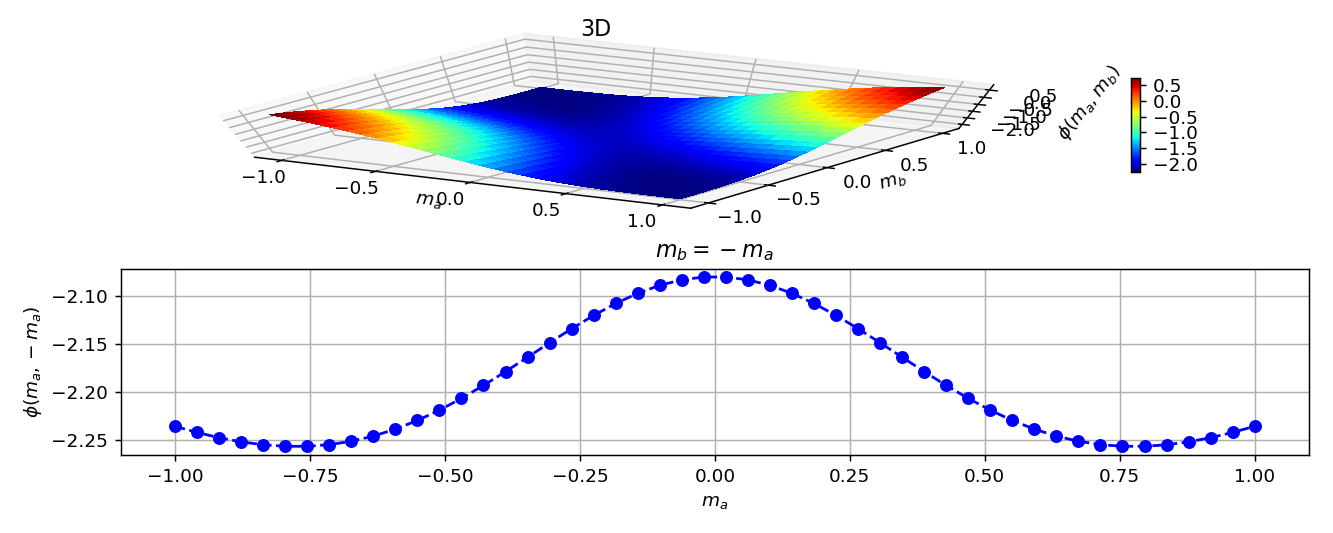

In [18]:
fig = plt.figure(figsize=(10,4), num="Landau Functional T = 3.0")

T = 3.0

ax = fig.add_subplot(2, 1, 1, projection='3d')

ax.set_title("3D")
ax.set_xlabel("$m_a$")
ax.set_ylabel("$m_b$")
ax.set_zlabel("$\phi(m_a,m_b)$") 
ax.set_xticks(np.linspace(-1, 1, 5, endpoint=True))
ax.set_yticks(np.linspace(-1, 1, 5, endpoint=True))
#ax.set_zticks([-2, 0, 2])

m_a = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_b = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_a, m_b = np.meshgrid(m_a, m_b)
LF = Landau_Functional((m_a, m_b),T)

surface = ax.plot_surface(m_a, m_b, LF, cmap=cm.jet, rstride=1, cstride=1,
                          linewidth=0, antialiased=False)
fig.colorbar(surface, shrink=0.5, aspect=10)

ax2 = fig.add_subplot(2, 1, 2)

ax2.set_title("$m_b = -m_a $")
ax2.set_xlabel("$m_a$")
ax2.set_ylabel("$\phi(m_a,-m_a)$")
ax2.grid(True)

m_a = np.linspace(-1.0, 1.0, 50, endpoint=True)
LF = Landau_Functional_Lineplot(m_a,T)

ax2.plot(m_a, LF, 'bo--')

plt.tight_layout()

plt.show()

### Landau Functional Plot 3D T = 3.0

<IPython.core.display.Javascript object>


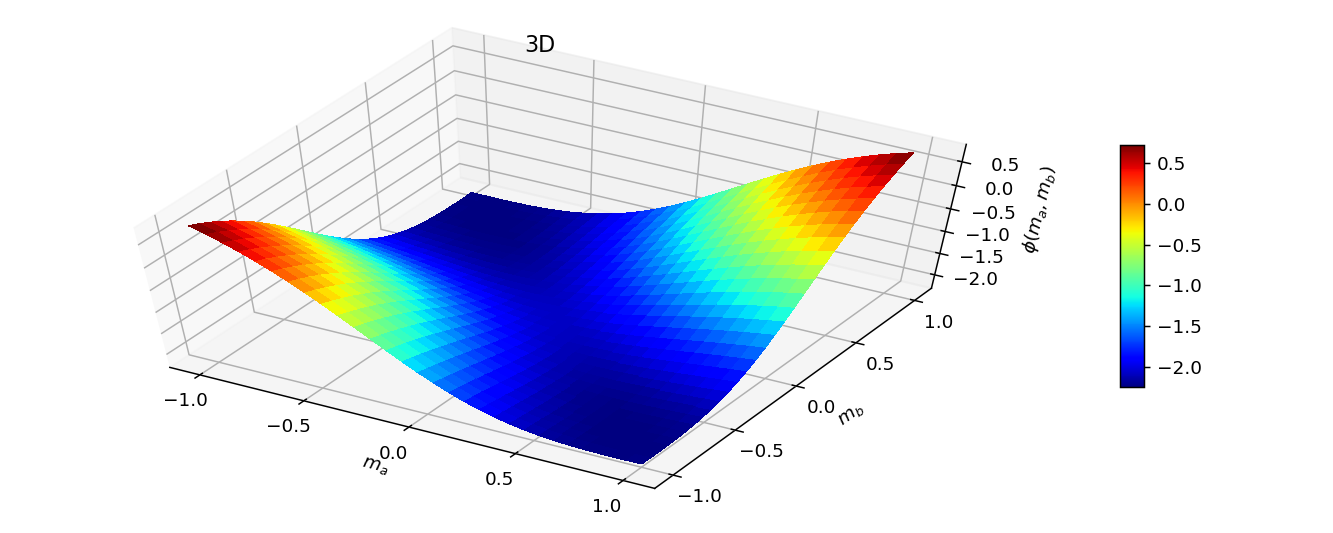

In [19]:
fig = plt.figure(figsize=(10,4), num="Landau Functional T = 3.0 (only 3D)")

T = 3.0

ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.set_title("3D")
ax.set_xlabel("$m_a$")
ax.set_ylabel("$m_b$")
ax.set_zlabel("$\phi(m_a,m_b)$")
ax.set_xticks(np.linspace(-1, 1, 5, endpoint=True))
ax.set_yticks(np.linspace(-1, 1, 5, endpoint=True))
#ax.set_zticks([-2, 0, 2])

m_a = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_b = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_a, m_b = np.meshgrid(m_a, m_b)
LF = Landau_Functional((m_a, m_b),T)

surface = ax.plot_surface(m_a, m_b, LF, cmap=cm.jet, rstride=1, cstride=1,
                          linewidth=0, antialiased=False)

fig.colorbar(surface, shrink=0.5, aspect=10)

plt.tight_layout()

plt.show()

### Landau Functional Plot T = 4.5

<IPython.core.display.Javascript object>


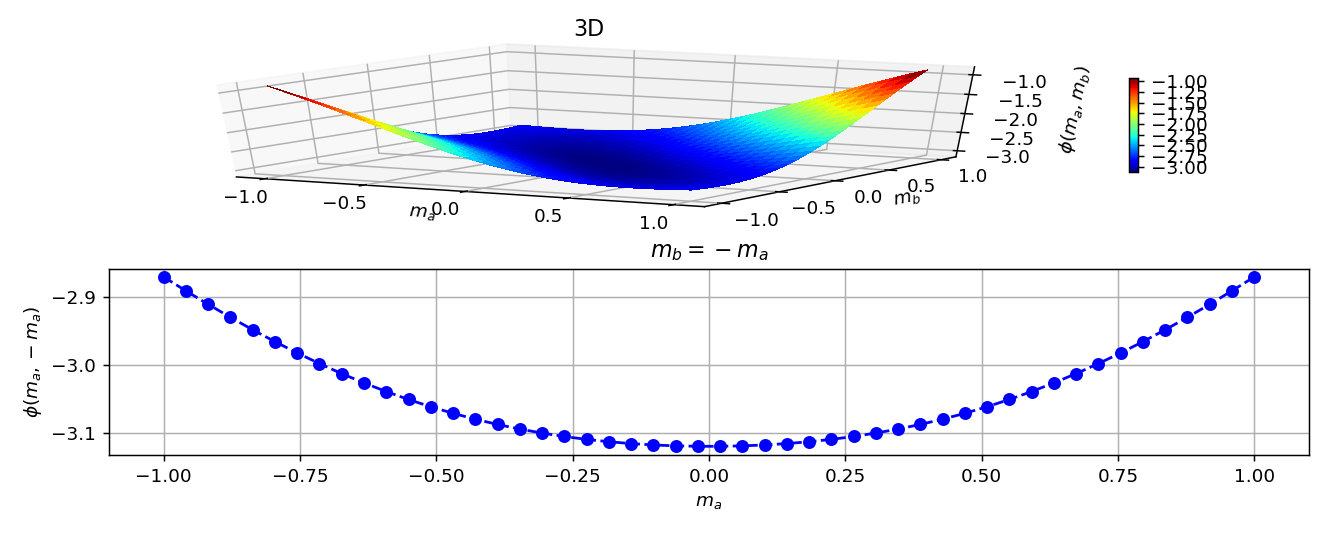

In [20]:
fig = plt.figure(figsize=(10,4), num="Landau Functional T = 4.5")

T = 4.5

ax = fig.add_subplot(2, 1, 1, projection='3d')

ax.set_title("3D")
ax.set_xlabel("$m_a$")
ax.set_ylabel("$m_b$")
ax.set_zlabel("$\phi(m_a,m_b)$") 
ax.set_xticks(np.linspace(-1, 1, 5, endpoint=True))
ax.set_yticks(np.linspace(-1, 1, 5, endpoint=True))
#ax.set_zticks([-2, 0, 2])

m_a = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_b = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_a, m_b = np.meshgrid(m_a, m_b)
LF = Landau_Functional((m_a, m_b),T)

surface = ax.plot_surface(m_a, m_b, LF, cmap=cm.jet, rstride=1, cstride=1,
                          linewidth=0, antialiased=False)
fig.colorbar(surface, shrink=0.5, aspect=10)

ax2 = fig.add_subplot(2, 1, 2)

ax2.set_title("$m_b = -m_a $")
ax2.set_xlabel("$m_a$")
ax2.set_ylabel("$\phi(m_a,-m_a)$")
ax2.grid(True)

m_a = np.linspace(-1.0, 1.0, 50, endpoint=True)
LF = Landau_Functional_Lineplot(m_a,T)

ax2.plot(m_a, LF, 'bo--')

plt.tight_layout()

plt.show()

### Landau Functional Plot 3D T = 4.5

<IPython.core.display.Javascript object>


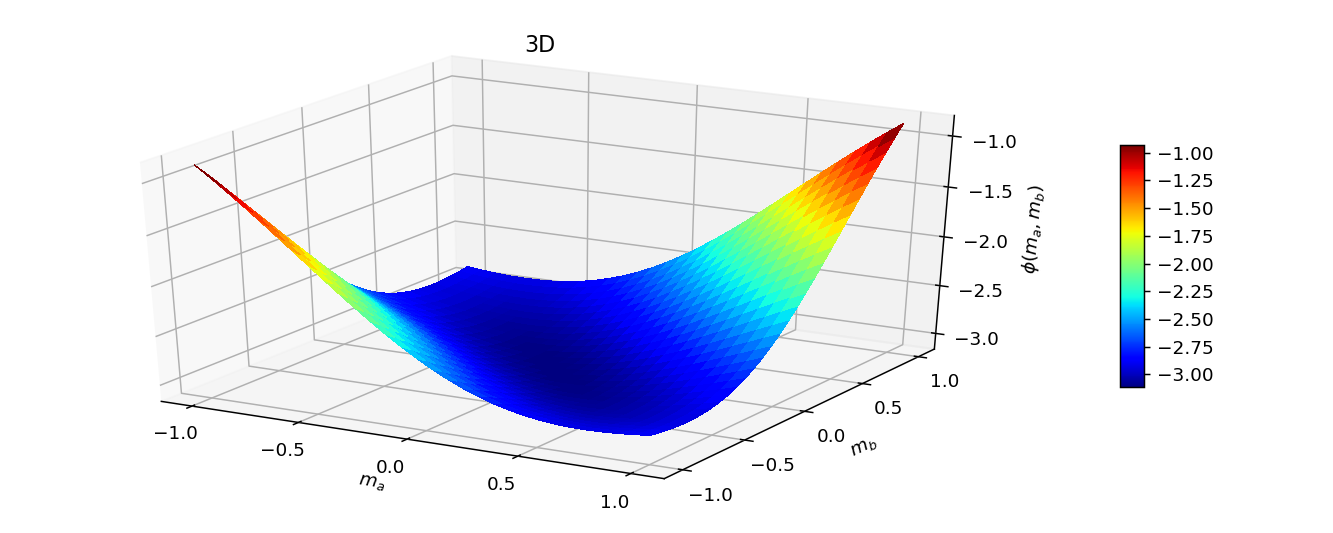

In [21]:
fig = plt.figure(figsize=(10,4), num="Landau Functional T = 4.5 (only 3D)")

T = 4.5

ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.set_title("3D")
ax.set_xlabel("$m_a$")
ax.set_ylabel("$m_b$")
ax.set_zlabel("$\phi(m_a,m_b)$")
ax.set_xticks(np.linspace(-1, 1, 5, endpoint=True))
ax.set_yticks(np.linspace(-1, 1, 5, endpoint=True))
#ax.set_zticks([-2, 0, 2])

m_a = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_b = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_a, m_b = np.meshgrid(m_a, m_b)
LF = Landau_Functional((m_a, m_b),T)

surface = ax.plot_surface(m_a, m_b, LF, cmap=cm.jet, rstride=1, cstride=1,
                          linewidth=0, antialiased=False)

fig.colorbar(surface, shrink=0.5, aspect=10)

plt.tight_layout()

plt.show()

### Minimization

In [22]:
T_steps = np.linspace(0.5, 6.1, 50, endpoint=True)
result = np.zeros((1,4))
m = [0.0,0.0]

for T_run in T_steps:
    res = minimize(Landau_Functional, m, args=(T_run),\
                             method='Nelder-Mead', tol=1e-8,\
                             callback=None, options={'disp': False,\
                                                     'maxiter': None,\
                                                     'return_all': False,\
                                                     'maxfev': None,\
                                                     'xtol': 0.0001,\
                                                     'ftol': 0.0001})
    temp = np.concatenate((res.x,[res.fun]), axis=0)
    temp = np.concatenate((temp,[T_run]), axis=0)
    result = np.vstack([result,temp])

result = np.delete(result, 0, 0)

### Variational Procedure - Phasediagram

<IPython.core.display.Javascript object>


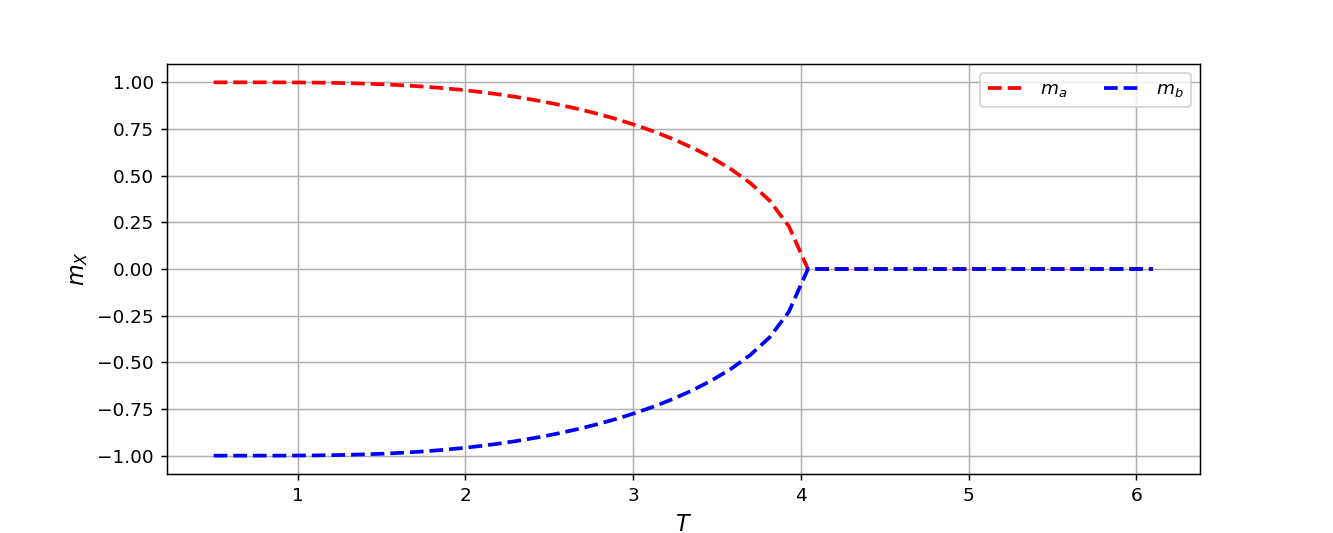

In [23]:
fig = plt.figure(figsize=(10,4), num="Phasediagram Variational Procedure")
ax = fig.add_subplot(111)

ax.set_xlabel('$T$', fontsize=12, fontweight='bold')
ax.set_ylabel('$m_X$', fontsize=12, fontweight='bold')

plt.plot([i[3] for i in result], [i[0] for i in result], color='red', label="$m_a$", linestyle='--', linewidth=2.0)
plt.plot([i[3] for i in result], [i[1] for i in result], color='blue', label="$m_b$", linestyle='--', linewidth=2.0)

plt.legend(ncol = 2)

plt.grid(True)
plt.show()